In [63]:
import numpy as np
import pandas as pd
import scipy.signal
from statsmodels.tsa.stattools import adfuller as ADF
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

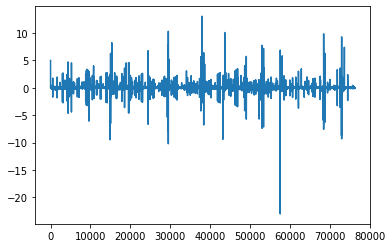

In [85]:
dataset_train = pd.read_csv('result/Calculated_result.csv',usecols=['Calculated_VIX'])[198239:]
data_diff = dataset_train.diff(1)[1:]
data1 = np.array(data_diff)
data1 = data1.reshape(len(data1))
# data1 = scipy.signal.medfilt(data1,5)
# print(ADF(data1))
plt.plot(data1)
# fig = plt.gcf()
# fig.set_size_inches(8.5, 6.5)
# plt.savefig('beforeadf.png')

In [90]:
dataset_train = pd.read_csv('result/Calculated_result.csv',usecols=['Calculated_VIX'])[198240:]
data = np.array(dataset_train)
data = data.reshape(len(data))
data = scipy.signal.medfilt(data,5)
# print(ADF(data))
# print(ADF(data,maxlag = 1))
# print(ADF(data,maxlag = 2))

In [94]:
dataset_train = pd.read_csv('result/Calculated_result.csv',usecols=['Calculated_VIX'])[198240:]
data = np.array(dataset_train)
data = data.reshape(len(data))
# data = scipy.signal.medfilt(data,5)
# print(ADF(data))
# print(ADF(data,maxlag = 1))
# print(ADF(data,maxlag = 2))

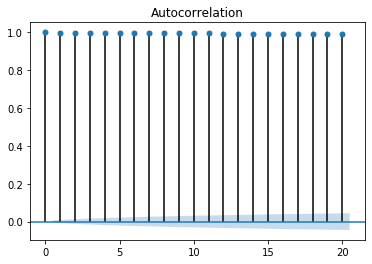

In [95]:
sm.graphics.tsa.plot_acf(data, lags=20)
plt.show()

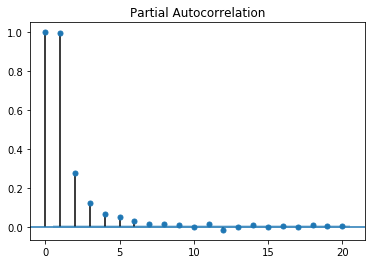

In [96]:
sm.graphics.tsa.plot_pacf(data, lags=20)
plt.show()

In [102]:
evaluate = sm.tsa.arma_order_select_ic(data, ic=['aic', 'bic'], trend='nc', max_ar=10,max_ma=10)
print(evaluate.aic_min_order)
print(evaluate.bic_min_order)

(9, 0)
(8, 0)


In [11]:
valid = data1[76300:]
valid

array([-0.00320026,  0.04573458, -0.02591194, -0.05833985,  0.00580644,
       -0.02156335, -0.00451961, -0.00624481,  0.0116705 ,  0.00226888,
       -0.04333636,  0.02342231,  0.02147384,  0.01164635,  0.04617426,
        0.02438917, -0.02620335,  0.00392216,  0.00015444, -0.01723237])

In [98]:
# model = ARIMA_Model(data1, (0, 0, 4))
# fit_seq = model.fittedvalues
# predict_seq = model.predict(start='2014-08-01', end='2014-08-10', dynamic=True)
model = ARIMA(data1[:76300], order=(7,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                76299
Model:                 ARIMA(7, 1, 0)   Log Likelihood               -8011.824
Method:                       css-mle   S.D. of innovations              0.269
Date:                Fri, 01 May 2020   AIC                          16041.648
Time:                        23:57:05   BIC                          16124.830
Sample:                             1   HQIC                         16067.203
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.149e-05      0.000     -0.072      0.943      -0.000       0.000
ar.L1.D.y     -1.1616      0.004   -323.969      0.000      -1.169      -1.155
ar.L2.D.y     -1.1010      0.005   -204.355      0.0

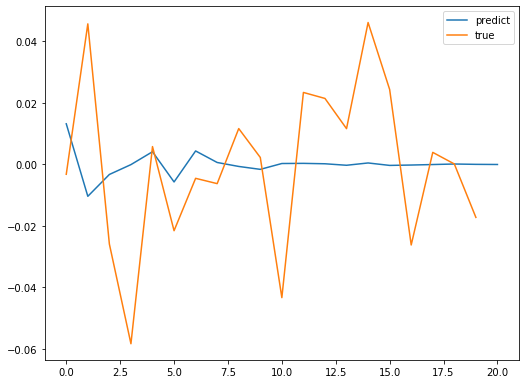

In [106]:
predict=model_fit.predict(start=76300,end=76320)
plt.plot(predict,label='predict')
plt.plot(valid,label='true')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(8.5, 6.5)
plt.savefig('arimapredict.png')
plt.show()

120


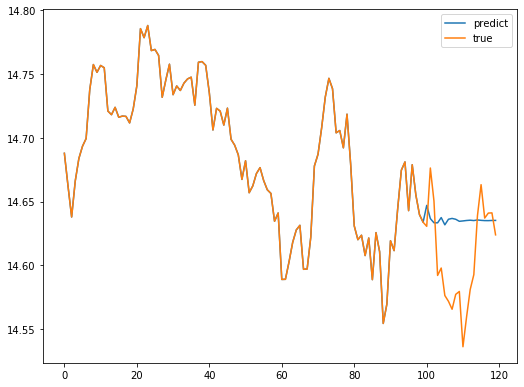

In [119]:
predict_result = [0]*20
predict_result[0] = data[76299] + predict[0]
for i in range(1,20):
#     predict_result[i] = data[76299]+predict[i]
    predict_result[i] = predict_result[i-1]+predict[i]
predict_show = np.concatenate((data[76200:76300],predict_result))
plt.plot(predict_show,label='predict')
plt.plot(data[76200:],label = 'true')
fig = plt.gcf()
fig.set_size_inches(8.5, 6.5)
plt.savefig('arimaresult.png')
plt.legend()
plt.show()

In [123]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
def _error(actual: np.ndarray, predicted: np.ndarray):
    """ Simple error """
    return actual - predicted
def mae(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Absolute Error """
    return np.mean(np.abs(_error(actual, predicted)))
def _naive_forecasting(actual: np.ndarray, seasonality: int = 1):
    """ Naive forecasting method which just repeats previous samples """
    return actual[:-seasonality]
def mase(actual: np.ndarray, predicted: np.ndarray, seasonality: int = 1):
    return mae(actual, predicted) / mae(actual[seasonality:], _naive_forecasting(actual, seasonality))
def mse(true,pred):
    return np.square(np.subtract(true,pred)).mean()
print('MAPE',mean_absolute_percentage_error(valid,predict[1:]))
print('RMSE',rmse(predict[1:],valid))
print('MASE',mase(valid,predict[1:]))
print('MSE',mse(valid,predict[1:]))
print(predict)
print(valid)

MAPE 111.9008136421208
RMSE 0.027270058618220436
MASE 0.7065527639276492
MSE 0.0007436560970411788
[ 1.32219791e-02 -1.03702372e-02 -3.26340973e-03 -5.72281368e-05
  4.13434072e-03 -5.69752891e-03  4.38682613e-03  6.37066963e-04
 -6.55402760e-04 -1.60223567e-03  3.00678849e-04  3.48230992e-04
  2.15902432e-04 -2.71134516e-04  4.78328656e-04 -3.15260881e-04
 -1.95140175e-04 -3.10907866e-05  1.36914236e-04  2.68453728e-05
 -1.75612513e-05]
[-0.00320026  0.04573458 -0.02591194 -0.05833985  0.00580644 -0.02156335
 -0.00451961 -0.00624481  0.0116705   0.00226888 -0.04333636  0.02342231
  0.02147384  0.01164635  0.04617426  0.02438917 -0.02620335  0.00392216
  0.00015444 -0.01723237]


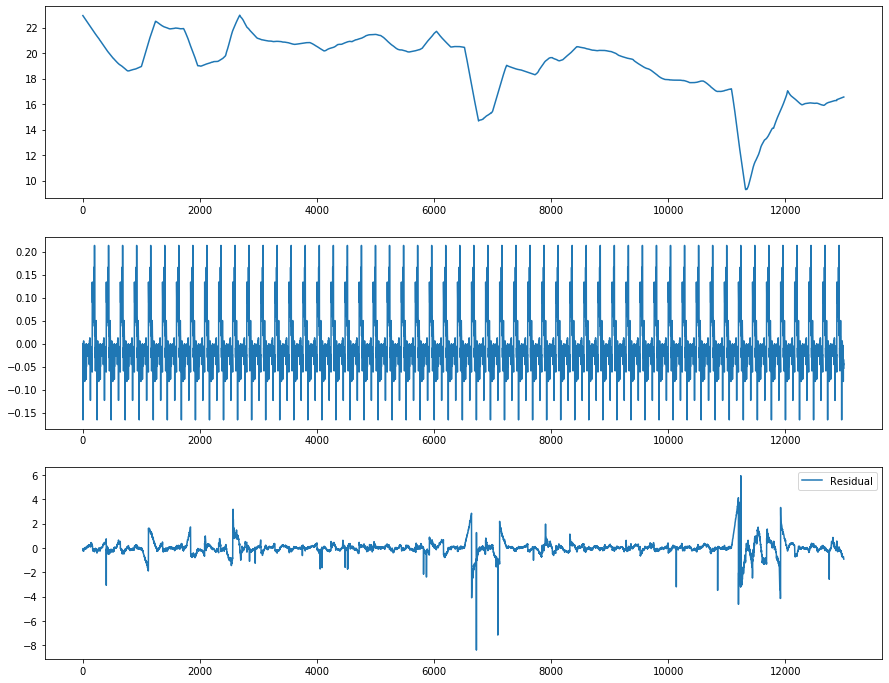

In [172]:
decomposition = seasonal_decompose(data[:13000],freq=240,extrapolate_trend='freq')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(15,12))
plt.subplot(311)
plt.plot(trend, label='Trend')
plt.subplot(312)
plt.plot(seasonal, label='Seasonarity')
plt.subplot(313)
plt.plot(residual, label='Residual')
plt.legend()
plt.show()

In [164]:
print(ADF(trend))
print(ADF(residual))

(-3.720384257187753, 0.003835397934504687, 40, 12959, {'1%': -3.430854714545026, '5%': -2.8617630594151686, '10%': -2.5668887295902887}, -138185.5703268359)
(-12.4050247530474, 4.4724289427013546e-23, 41, 12958, {'1%': -3.4308547535027802, '5%': -2.8617630766311484, '10%': -2.5668887387542276}, -1221.7782697982802)


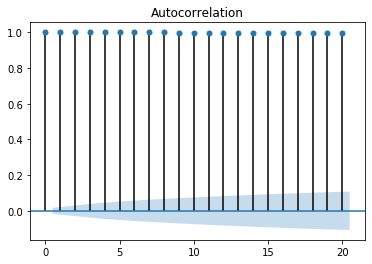

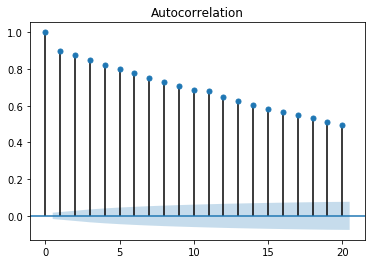

In [179]:
sm.graphics.tsa.plot_acf(trend, lags=20)
sm.graphics.tsa.plot_acf(residual, lags=20)
plt.show()

In [104]:
sm.stats.acorr_ljungbox(model_fit.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,3786.938658,0.0


In [135]:
garch = pd.read_csv('data/garch_mse.csv')
vixpred = garch['VIXpred']
garchpred = garch['GARCHpred']
combpred = garch['combpred']
trueRV = garch['TRUE']

In [136]:
print('MAPE',mean_absolute_percentage_error(trueRV,vixpred),mean_absolute_percentage_error(trueRV,garchpred),mean_absolute_percentage_error(trueRV,combpred))
print('RMSE',rmse(vixpred,trueRV),rmse(garchpred,trueRV),rmse(combpred,trueRV))
print('MASE',mase(trueRV,vixpred),mase(trueRV,garchpred),mase(trueRV,combpred))
print('MSE',mse(trueRV,vixpred),mse(trueRV,garchpred),mse(trueRV,combpred))

MAPE 25.807205583715504 25.681631665962097 25.064780161233593
RMSE 0.07140542881505921 0.07200439040480212 0.06989233236929553
MASE inf inf inf
MSE 0.005098735264262489 0.005184632237567161 0.004884938124020075


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
